# 📊 Analisi Dataset LendingClub - Indice

## 📑 Indice dei Contenuti

### 🔧 Preparazione dei Dati
1. [Caricamento e Ispezione Iniziale](#caricamento)
2. [Rinomina delle Variabili](#rinomina)
3. [Descrizione delle Variabili](#descrizione)
4. [Conversione Tipi di Dato](#conversione)
5. [Gestione Valori Mancanti](#valori-mancanti)

### 📈 Analisi Univariata
6. [Analisi Distribuzioni Generali](#distribuzioni-generali)
7. [Boxplot Variabili Continue](#boxplot-generali)

### 🔍 Analisi Dettagliate per Variabile

#### 💰 Interest Rate (Tasso di Interesse)
8. [Distribuzione Interest Rate](#interest-rate-dist)
9. [Identificazione Outliers Interest Rate](#interest-rate-outliers)
10. [Pulizia Interest Rate](#interest-rate-clean)
11. [Statistiche Descrittive Interest Rate](#interest-rate-stats)
12. [Analisi Asimmetria (Skewness)](#interest-rate-skewness)
13. [Analisi Curtosi (Kurtosis)](#interest-rate-kurtosis)
14. [Visualizzazione Completa Interest Rate](#interest-rate-complete)
15. [Frequenze Interest Rate](#interest-rate-freq)
16. [ECDF Interest Rate](#interest-rate-ecdf)
17. [Conclusioni Interest Rate](#interest-rate-conclusioni)

#### 💵 Installment (Rata Mensile)
18. [Analisi Installment](#installment-analisi)
19. [Distribuzione Installment](#installment-dist)
20. [Boxplot Installment](#installment-boxplot)

---

**Nota**: Clicca sui link per navigare direttamente alla sezione di interesse!

<a id="caricamento"></a>
# Analisi Esplorativa del Dataset LendingClub

Iniziamo l'esplorazione del dataset che contiene informazioni sui prestiti concessi da LendingClub. L'obiettivo è:
1. Caricare e visualizzare la struttura del dataset
2. Comprendere le variabili disponibili
3. Identificare eventuali problemi nei dati

Prima fase: caricamento del dataset e ispezione delle colonne per capire quali trasformazioni saranno necessarie.

In [1]:
import pandas as pd
data=pd.read_csv("loans.csv")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('loans.csv')

data.columns

Index(['customer.id', 'credit.policy', 'purpose', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
       'not.fully.paid'],
      dtype='object')

<a id="rinomina"></a>
# Rinomina delle Variabili per Maggiore Chiarezza

I nomi originali delle colonne contengono punti e abbreviazioni che possono rendere il codice meno leggibile e potenzialmente causare problemi. Procediamo a:

1. Rimuovere i punti dai nomi delle colonne
2. Utilizzare il formato snake_case (standard in Python)
3. Rendere i nomi più descrittivi e comprensibili
4. Mantenere alcuni acronimi standard del settore (es. FICO, DTI)

In [3]:
new_columns = {
    'customer.id': 'customer_id',
    'credit.policy': 'credit_policy', 
    'purpose': 'purpose',
    'int.rate': 'interest_rate',
    'installment': 'installment',
    'log.annual.inc': 'log_annual_income',
    'dti': 'dti',         
    'fico': 'fico_score',             
    'days.with.cr.line': 'credit_history_days',
    'revol.bal': 'revolving_balance',
    'revol.util': 'revolving_util',
    'inq.last.6mths': 'inquiries_last_6m',
    'delinq.2yrs': 'delinquencies_2y',
    'pub.rec': 'public_records',
    'not.fully.paid': 'not_fully_paid'
}

data = data.rename(columns=new_columns)


print(data.columns.tolist())

['customer_id', 'credit_policy', 'purpose', 'interest_rate', 'installment', 'log_annual_income', 'dti', 'fico_score', 'credit_history_days', 'revolving_balance', 'revolving_util', 'inquiries_last_6m', 'delinquencies_2y', 'public_records', 'not_fully_paid']


<a id="descrizione"></a>
## Descrizione delle Variabili

- **customer_id**: Identificatore univoco del cliente
- **credit_policy**: Flag binario (0/1) che indica se il cliente soddisfa i criteri della politica creditizia
- **purpose**: Scopo dichiarato del prestito (es. consolidamento debiti, carta di credito, etc.)
- **interest_rate**: Tasso di interesse applicato al prestito (percentuale)
- **installment**: Importo della rata mensile del prestito
- **log_annual_income**: Logaritmo naturale del reddito annuale del cliente
- **dti**: Debt-to-Income ratio - Rapporto tra debito mensile totale e reddito mensile
- **fico_score**: Punteggio creditizio FICO (range 300-850)
- **credit_history_days**: Numero di giorni trascorsi dall'apertura della prima linea di credito
- **revolving_balance**: Saldo corrente sulle linee di credito revolving
- **revolving_util**: Tasso di utilizzo del credito revolving (saldo/limite di credito)
- **inquiries_last_6m**: Numero di richieste di informazioni creditizie negli ultimi 6 mesi
- **delinquencies_2y**: Numero di ritardi nei pagamenti negli ultimi 2 anni
- **public_records**: Numero di eventi negativi nei registri pubblici (fallimenti, pignoramenti, etc.)
- **not_fully_paid**: Variabile binaria che indica se il prestito è stato completamente rimborsato (0) o no (1)

# DA RIVEDERE INTEREST RATE SE HA SENSO ESSERE 0

In [4]:
data.head(10)

,customer_id,credit_policy,purpose,interest_rate,installment,log_annual_income,dti,fico_score,credit_history_days,revolving_balance,revolving_util,inquiries_last_6m,delinquencies_2y,public_records,not_fully_paid
0,10001,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854.0,52.1,0.0,0,0,0
1,10002,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623.0,76.7,0.0,0,0,0
2,10003,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511.0,25.6,1.0,0,0,0
3,10004,1,debt_consolidation,0.1008,162.34,11.350407,8.1,712,2699.958333,33667.0,73.2,1.0,0,0,0
4,10005,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740.0,39.5,0.0,1,0,0
5,10006,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807.0,51,0.0,0,0,0
6,10007,1,debt_consolidation,0.1496,194.02,10.714418,4,667,3180.041667,3839.0,76.8,0.0,0,1,1
7,10008,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220.0,68.6,0.0,0,0,1
8,10009,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909.0,51.1,1.0,0,0,0
9,10010,1,debt_consolidation,0.1221,84.12,10.203592,10,707,2730.041667,5630.0,23,1.0,0,0,0


In [5]:
print(len(data))

9578


# Analisi Preliminare dei Valori Nulli

Dall'ispezione iniziale emerge che i valori 0 nel dataset hanno un significato semantico e non rappresentano dati mancanti. Per esempio:
- 0 in `credit_policy` indica che il cliente non soddisfa i criteri
- 0 in `delinquencies_2y` indica assenza di ritardi nei pagamenti
- 0 in `public_records` indica assenza di eventi negativi

Questi valori sono quindi significativi per l'analisi e non devono essere trattati come dati mancanti.

<a id="valori-mancanti"></a>
# Gestione dei Valori Mancanti

Durante la fase di pulizia dei dati, abbiamo identificato alcuni valori mancanti nel dataset. Data la dimensione significativa del dataset, abbiamo due opzioni principali:

1. **Approccio Immediato**: 
   - Procedere con l'analisi usando solo i record completi
   - Utile per una prima esplorazione dei dati

2. **Approccio Successivo**:
   - Analizzare il pattern dei valori mancanti
   - Valutare tecniche di imputazione appropriate (media, mediana, KNN)
   - Considerare l'impatto dei valori mancanti sulle analisi successive

La scelta dipenderà dalla quantità di dati mancanti e dal loro impatto sulle variabili di interesse.

In [6]:
missing = data[data['customer_id']==0]

print(len(missing))

0


In [7]:
data.loc[30]

customer_id                         10031
credit_policy                           1
purpose                debt_consolidation
interest_rate                      0.0807
installment                        156.84
log_annual_income               11.512925
dti                                   2.3
fico_score                            742
credit_history_days           3148.958333
revolving_balance                  9698.0
revolving_util                       19.4
inquiries_last_6m                     0.0
delinquencies_2y                        0
public_records                          0
not_fully_paid                          0
Name: 30, dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          9578 non-null   int64  
 1   credit_policy        9578 non-null   object 
 2   purpose              9578 non-null   object 
 3   interest_rate        9578 non-null   float64
 4   installment          9578 non-null   float64
 5   log_annual_income    9573 non-null   float64
 6   dti                  9578 non-null   object 
 7   fico_score           9578 non-null   int64  
 8   credit_history_days  9549 non-null   float64
 9   revolving_balance    9577 non-null   float64
 10  revolving_util       9516 non-null   object 
 11  inquiries_last_6m    9548 non-null   float64
 12  delinquencies_2y     9549 non-null   object 
 13  public_records       9549 non-null   object 
 14  not_fully_paid       9578 non-null   int64  
dtypes: float64(6), int64(3), object(6)
mem

In [9]:
data.describe()

,customer_id,interest_rate,installment,log_annual_income,fico_score,credit_history_days,revolving_balance,inquiries_last_6m,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9573.000000,9578.000000,9549.000000,9.577000e+03,9548.000000,9578.000000
mean,14789.500000,0.125529,319.089413,10.931892,711.159532,4562.026085,1.691529e+04,1.571743,0.160054
std,2765.074773,0.202225,207.071301,0.614766,42.024737,2497.985733,3.375770e+04,2.198151,0.366676
min,10001.000000,0.060000,15.670000,7.547502,612.000000,178.958333,0.000000e+00,0.000000,0.000000
25%,12395.250000,0.103900,163.770000,10.558414,682.000000,2820.000000,3.187000e+03,0.000000,0.000000
50%,14789.500000,0.122100,268.950000,10.928238,707.000000,4139.958333,8.596000e+03,1.000000,0.000000
75%,17183.750000,0.140700,432.762500,11.289832,737.000000,5730.000000,1.825200e+04,2.000000,0.000000
max,19578.000000,14.700000,940.140000,14.528354,1812.000000,17639.958330,1.207359e+06,33.000000,1.000000


<a id="conversione"></a>
# Pulizia e Conversione dei Tipi di Dato

Alcune variabili sono state importate con tipo `object` ma rappresentano dati numerici. È necessario convertirle al tipo appropriato per:

1. **Ottimizzare la Memoria**:
   - I tipi corretti occupano meno spazio
   - Migliorano le performance delle operazioni

2. **Abilitare Operazioni Matematiche**:
   - Calcolo di statistiche descrittive
   - Analisi numeriche e grafici

3. **Garantire la Consistenza**:
   - Variabili binarie come `Int64`
   - Percentuali e rapporti come `float`
   - Conteggi come `Int64`

Le conversioni verranno effettuate usando `pd.to_numeric()` con gestione appropriata degli errori.

In [10]:
# Convertiamo i tipi di dato corretti
# credit.policy dovrebbe essere int (0 o 1)
data['credit_policy'] = pd.to_numeric(data['credit_policy'], errors='coerce').astype('Int64')

# dti (debt-to-income ratio) dovrebbe essere float
data['dti'] = pd.to_numeric(data['dti'], errors='coerce')

# revol.util (revolving utilization) dovrebbe essere float
data['revolving_util'] = pd.to_numeric(data['revolving_util'], errors='coerce')

# delinq.2yrs dovrebbe essere int (numero di ritardi)
data['delinquencies_2y'] = pd.to_numeric(data['delinquencies_2y'], errors='coerce').astype('Int64')

# pub.rec dovrebbe essere int (numero di registrazioni pubbliche)
data['public_records'] = pd.to_numeric(data['public_records'], errors='coerce').astype('Int64')

print(f"Valori mancanti per colonna:")
percent_missing = data.isnull().mean() * 100

for col, pct in percent_missing.items():
    print(f"{col}: {pct:.2f}%")


Valori mancanti per colonna:
customer_id: 0.00%
credit_policy: 0.02%
purpose: 0.00%
interest_rate: 0.00%
installment: 0.00%
log_annual_income: 0.05%
dti: 0.01%
fico_score: 0.00%
credit_history_days: 0.30%
revolving_balance: 0.01%
revolving_util: 0.66%
inquiries_last_6m: 0.31%
delinquencies_2y: 0.31%
public_records: 0.31%
not_fully_paid: 0.00%


In [11]:
# Rimuoviamo le righe con valori mancanti
data = data.dropna()

print(f"Dimensione dataset dopo rimozione NaN: {len(data)} righe")
print(f"\nVerifica valori mancanti per colonna:")
print(data.isnull().sum())

Dimensione dataset dopo rimozione NaN: 9508 righe

Verifica valori mancanti per colonna:
customer_id            0
credit_policy          0
purpose                0
interest_rate          0
installment            0
log_annual_income      0
dti                    0
fico_score             0
credit_history_days    0
revolving_balance      0
revolving_util         0
inquiries_last_6m      0
delinquencies_2y       0
public_records         0
not_fully_paid         0
dtype: int64


<a id="distribuzioni-generali"></a>
# Analisi Univariata delle Distribuzioni

Analizziamo la distribuzione di tutte le variabili numeriche nel dataset, dividendole in due categorie:

1. **Variabili Continue**:
   - `interest_rate`: Tasso di interesse
   - `installment`: Rata mensile
   - `log_annual_income`: Reddito (log)
   - `dti`: Rapporto debito/reddito
   - `fico_score`: Punteggio creditizio
   - `credit_history_days`: Durata storia creditizia
   - `revolving_balance`: Saldo revolving
   - `revolving_util`: Utilizzo linee revolving

2. **Variabili Discrete** (categoriche o conteggi):
   - `credit_policy`: Binaria (0/1)
   - `delinquencies_2y`: Conteggio ritardi
   - `public_records`: Conteggio eventi negativi
   - `not_fully_paid`: Binaria (0/1)

Per ogni variabile continua calcoleremo e visualizzeremo:
- Distribuzione (istogramma + densità kernel)
- Statistiche principali (media, mediana)
- Indici di forma (asimmetria, curtosi)
- Dispersione (deviazione standard)

Per le variabili discrete mostreremo:
- Distribuzioni di frequenza
- Proporzioni delle diverse categorie

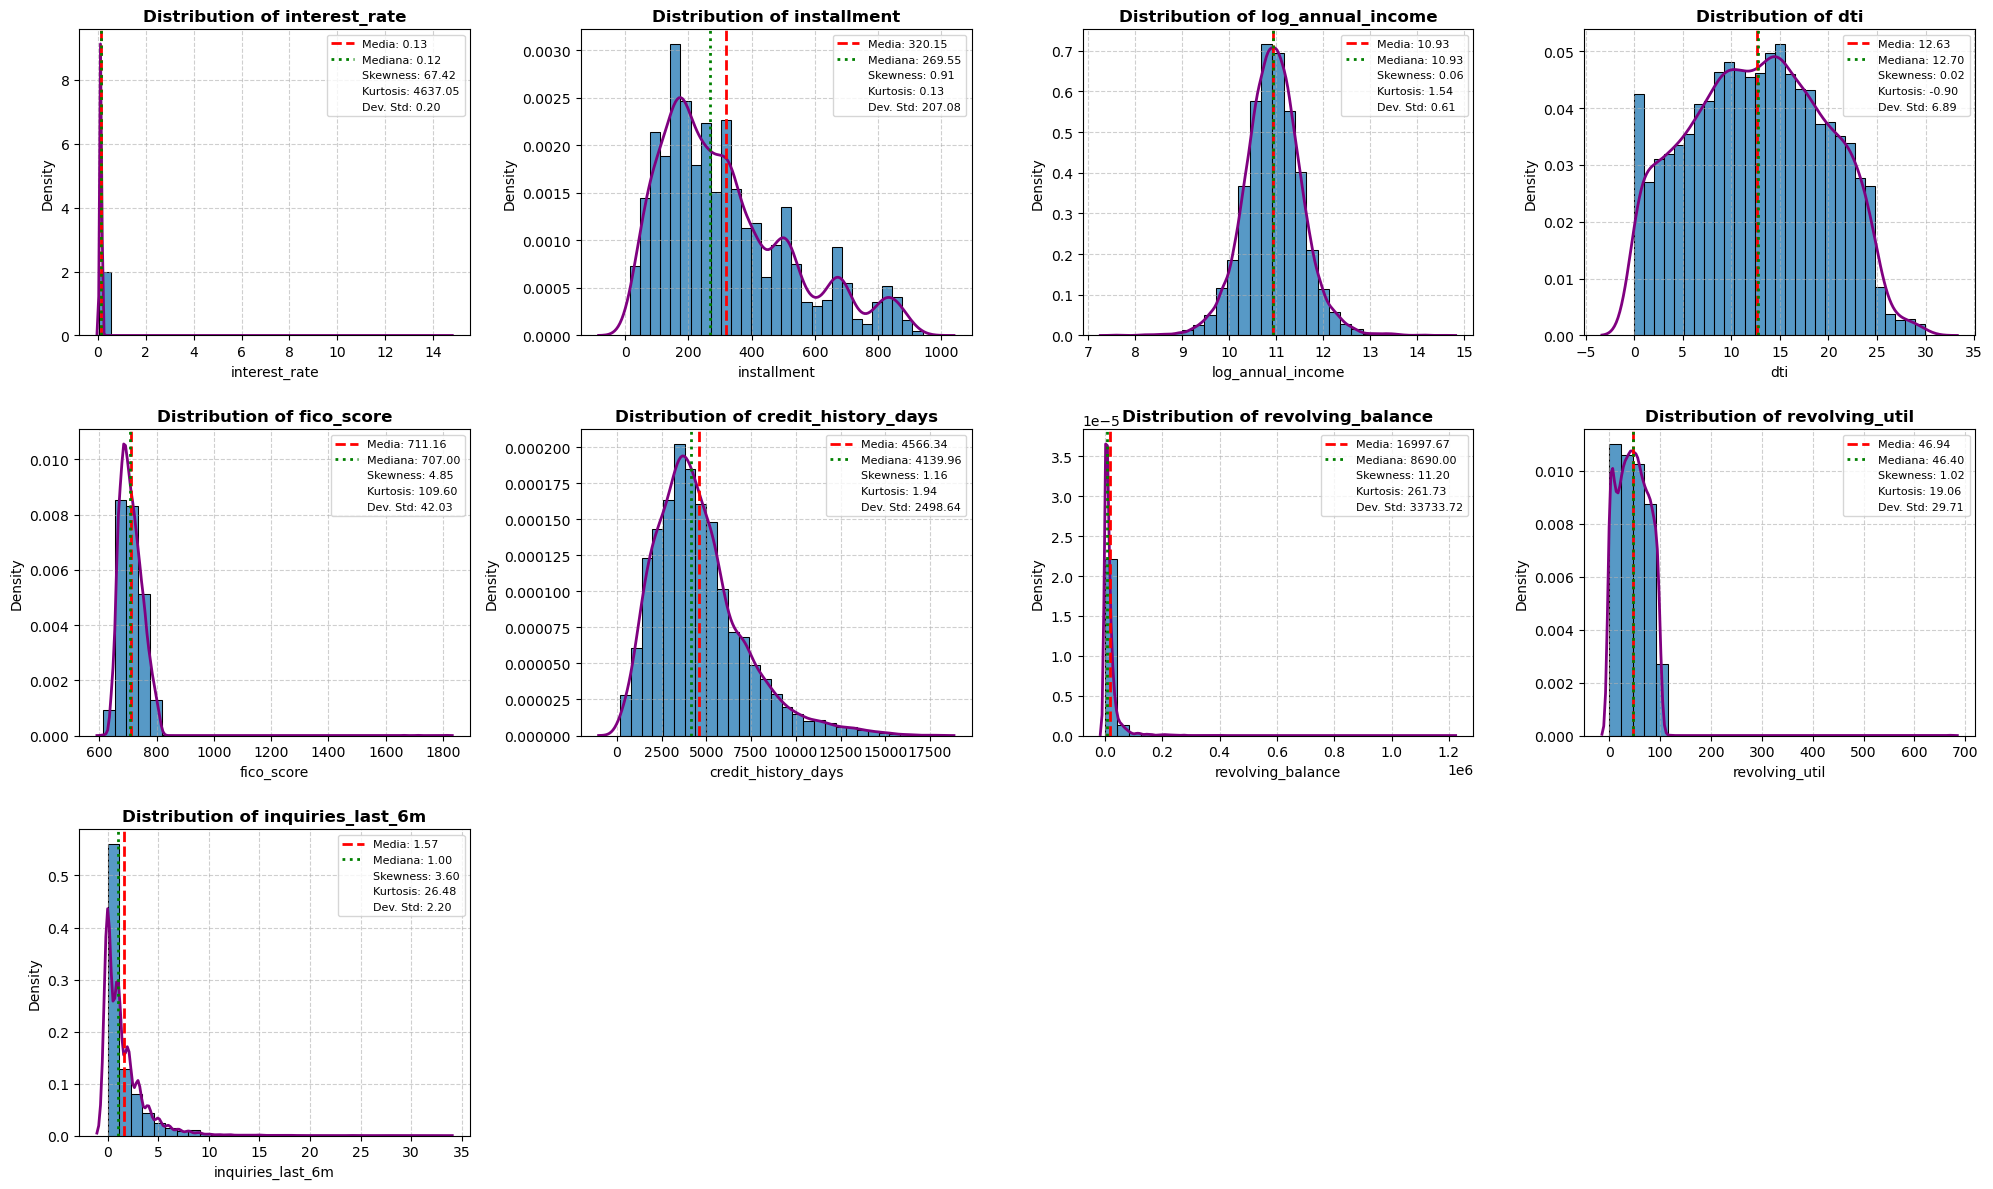

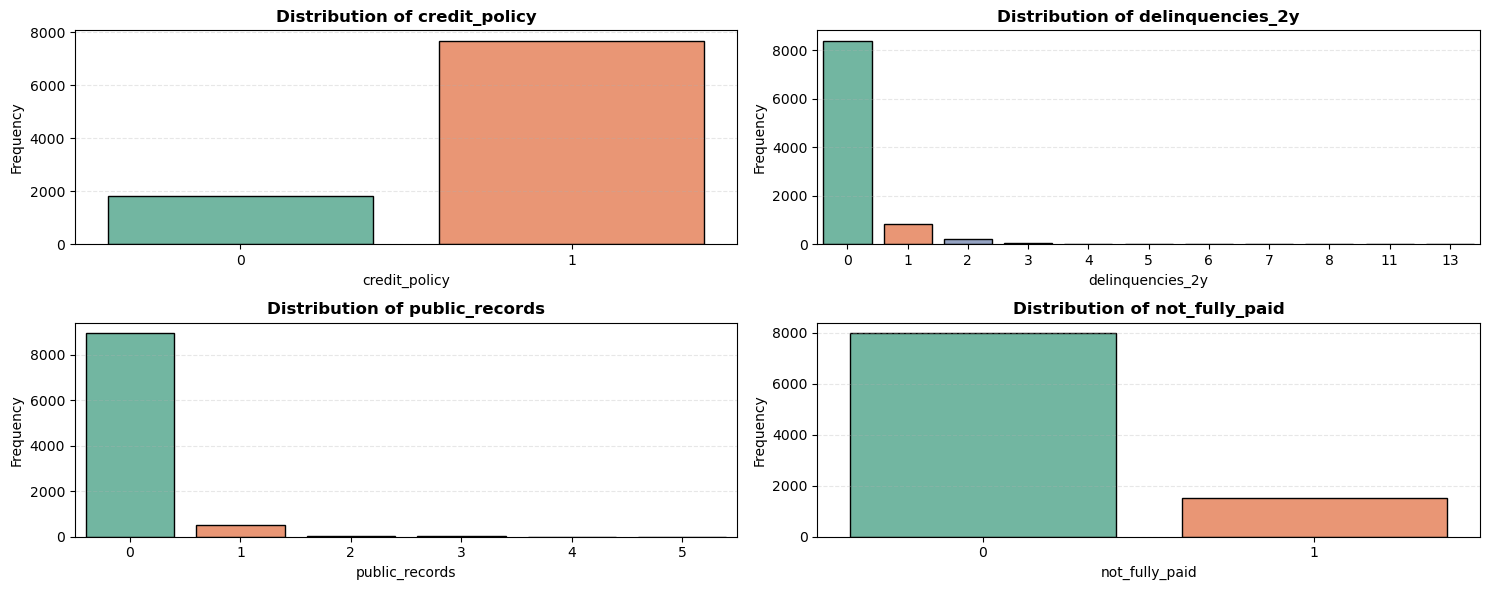

In [12]:

# Separiamo colonne continue e discrete
numeric_cols = data.select_dtypes(include=[np.number]).columns.drop('customer_id')
discrete_cols = ['credit_policy', 'delinquencies_2y', 'public_records', 'not_fully_paid']
continuous_cols = [col for col in numeric_cols if col not in discrete_cols]

# Griglia per variabili CONTINUE (istogramma + KDE)
n_cols_cont = len(continuous_cols)
n_rows_cont = int(np.ceil(n_cols_cont / 4))

plt.figure(figsize=(20, n_rows_cont * 4))

for i, col in enumerate(continuous_cols):
    plt.subplot(n_rows_cont, 4, i+1)
    vals = data[col].dropna()
    bins = np.linspace(vals.min(), vals.max(), 30)
    
    ax = sns.histplot(vals, bins=bins, edgecolor="black", stat='density', kde=False)
    sns.kdeplot(vals, color='purple', lw=2, ax=ax)
    
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    
    # Calcoliamo le statistiche
    mean_val = vals.mean()
    median_val = vals.median()
    skew_val = vals.skew()  
    kurt_val = vals.kurt()
    std_val = vals.std()
    
    # Linee verticali per media e mediana
    plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Mediana: {median_val:.2f}')
    
    # Statistiche nella legenda
    plt.plot([], [], ' ', label=f'Skewness: {skew_val:.2f}')
    plt.plot([], [], ' ', label=f'Kurtosis: {kurt_val:.2f}')
    plt.plot([], [], ' ', label=f'Dev. Std: {std_val:.2f}')
    
    plt.legend(fontsize=8, loc='best')
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Density', fontsize=10)

plt.tight_layout()
plt.show()

# Griglia per variabili DISCRETE (bar plot)
n_cols_disc = len(discrete_cols)
n_rows_disc = int(np.ceil(n_cols_disc / 2))

plt.figure(figsize=(15, n_rows_disc * 3))

for i, col in enumerate(discrete_cols):
    plt.subplot(n_rows_disc, 2, i+1)
    sns.countplot(data=data, x=col, hue=col, palette='Set2', legend=False, edgecolor="black")
    plt.title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Frequency', fontsize=10)
    plt.grid(True, linestyle="--", alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

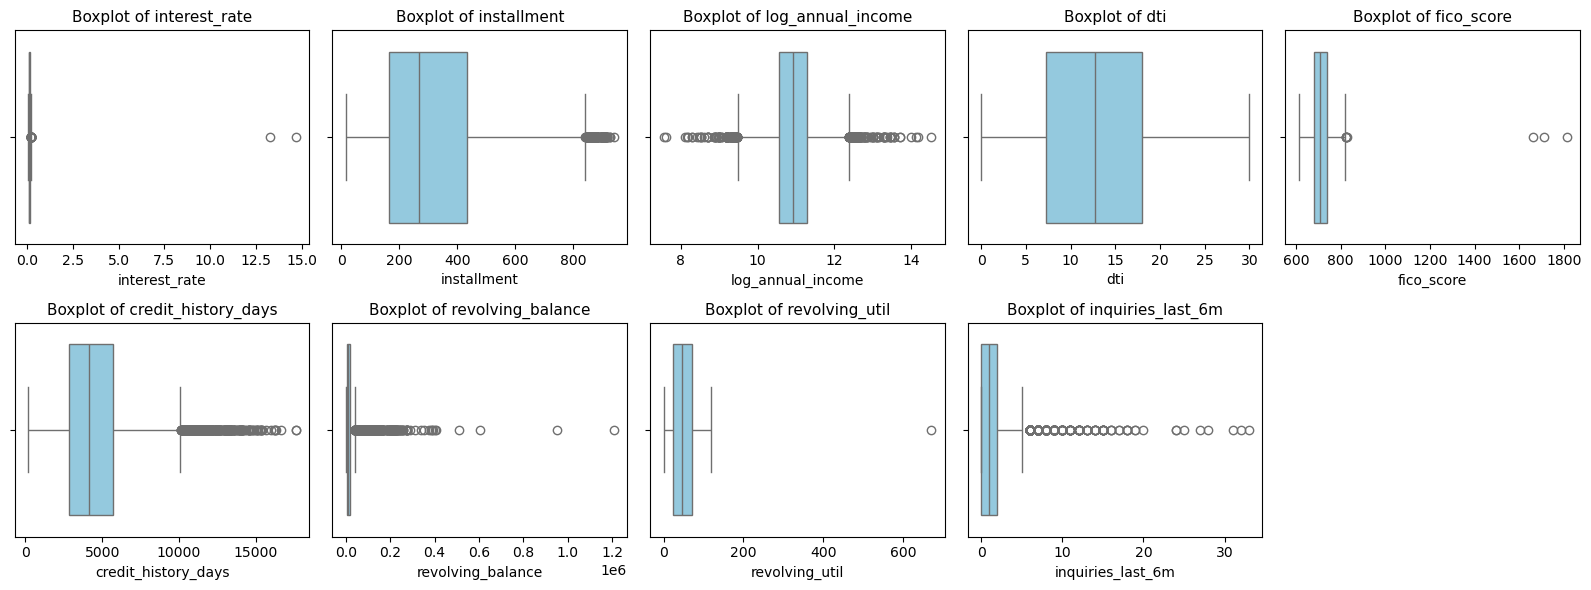

In [13]:
plt.figure(figsize=(16, 6))
for idx, col in enumerate(continuous_cols):
    plt.subplot(2, int(np.ceil(len(continuous_cols)/2)), idx+1)
    sns.boxplot(data=data, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}', fontsize=11)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

<a id="boxplot-generali"></a>
QUELLO CHE VOGLIO FARE E': andiamo ad analizzzare ad uno ad uno le variabili. vediamo se ci sono variabili mancanti o outlier e vediamo anche in percentuale.

<a id="interest-rate-dist"></a>
# ANALISI INTEREST_RATE (TASSO DI INTERESSE)

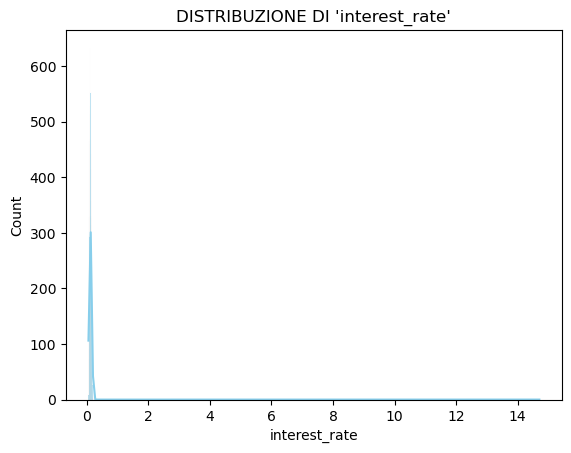

count    9508.000000
mean        0.125583
std         0.202949
min         0.060000
25%         0.103900
50%         0.122100
75%         0.140700
max        14.700000
Name: interest_rate, dtype: float64


In [14]:
sns.histplot(data=data, x='interest_rate', kde=True, color='skyblue')
plt.title("DISTRIBUZIONE DI 'interest_rate'")
plt.show()

print(data['interest_rate'].describe())  #Questo ti mostra:se i valori sono sbilanciati o anomali (outlier),se ci sono valori estremi o zero sospetti.


Troviamo 9578 osservazioni!
Ciò che ci turba è la deviazione standard che si discosta molto dalla media e il valore max!! 
Questo potrebbe indicare la presenza di valori anomali o outliers.

<a id="interest-rate-outliers"></a>
Visualizziamoli tramite BOXPLOT

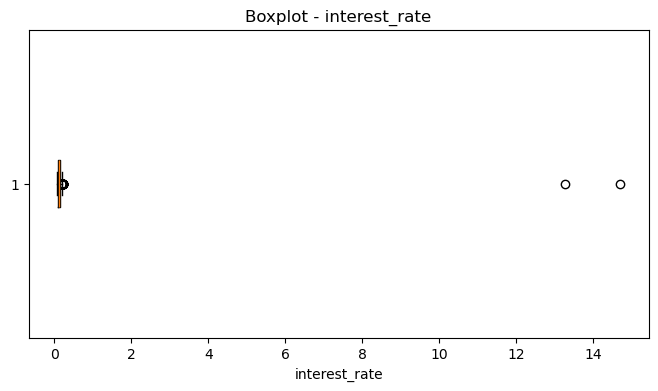

In [15]:
plt.figure(figsize=(8,4))
plt.boxplot(data['interest_rate'], vert=False)
plt.title('Boxplot - interest_rate')
plt.xlabel('interest_rate')
plt.show()


Abbiamo molti valori vicino lo zero e osserviamo come altri sono distaccati e arrivano fino a 14 il chè è strano.
Per cui andiamo a calcolare gli intervalli.

In [16]:
Q1 = data['interest_rate'].quantile(0.25)
Q3 = data['interest_rate'].quantile(0.75)
IQR = Q3 -Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f'Limite inferiore: {lower_bound:.4f}')
print(f'Limite superiore: {upper_bound:.4f}')

Limite inferiore: 0.0487
Limite superiore: 0.1959


Abbiamo un tasso di interesse tra il 4.9% e 19.6% siamo in un intervallo 'normale'. 
Ma poco fa abbiamo visto avere dei valori molto alti. Andiamo a controllare gli oulier

In [17]:
lower_outlier = data[data['interest_rate'] < lower_bound]

# Filtrare gli upper outliers
upper_outlier = data[data['interest_rate'] > upper_bound]

print("Numero di lower outliers:", len(lower_outlier))
print("Numero di upper outliers:", len(upper_outlier))

Numero di lower outliers: 0
Numero di upper outliers: 53


In [18]:
outliers = data[(data['interest_rate'] < lower_bound) | (data['interest_rate'] > upper_bound)]
print(f'NUMERO DI OUTLIERS TROVATI : {outliers.shape[0]}') 

NUMERO DI OUTLIERS TROVATI : 53


In [19]:
print("Esempi di outlier:")
print(outliers['interest_rate'].head())

Esempi di outlier:
170     14.7000
801     13.2500
2945     0.2086
3713     0.2011
3991     0.2011
Name: interest_rate, dtype: float64


<a id="interest-rate-clean"></a>
Proviamo a pulirlo ovvero togliere gli outliers

In [20]:
total_count = len(data)
outliers_count = len(outliers)

data_clean = data[(data['interest_rate'] >= lower_bound) & (data['interest_rate'] <= upper_bound)]
print(f'DIMENSIONE DATASET PULITO (SENZA OUTLIERS) : {data_clean.shape[0]} righe')

# Calcola la percentuale di outliers rimossi
cleaned_count = len(data_clean)
removed_percentage = (outliers_count / total_count) * 100
# Stampa il risultato
print(f"Percentuale di outliers rimossi: {removed_percentage:.2f}%")

DIMENSIONE DATASET PULITO (SENZA OUTLIERS) : 9455 righe
Percentuale di outliers rimossi: 0.56%


Adesso abbiamo un dataset comunque molto grande ma più pulito!!                                                                                              Rimuovendo gli outliers andiamo a visualizzare in maniera più chiara  i nostri dati.

<a id="interest-rate-stats"></a>
ADESSO MI VADO A CALCOLARE LE STATISTICHE DOPO AVER TOLTO GLI OUTLIERS

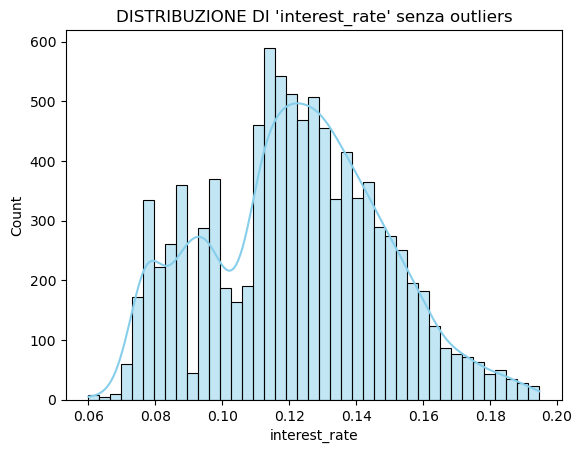

count    9455.000000
mean        0.122231
std         0.026207
min         0.060000
25%         0.103900
50%         0.122100
75%         0.139200
max         0.194700
Name: interest_rate, dtype: float64


In [21]:
sns.histplot(data=data_clean, x='interest_rate', kde=True, color='skyblue')
plt.title("DISTRIBUZIONE DI 'interest_rate' senza outliers")
plt.show()

print(data_clean['interest_rate'].describe())

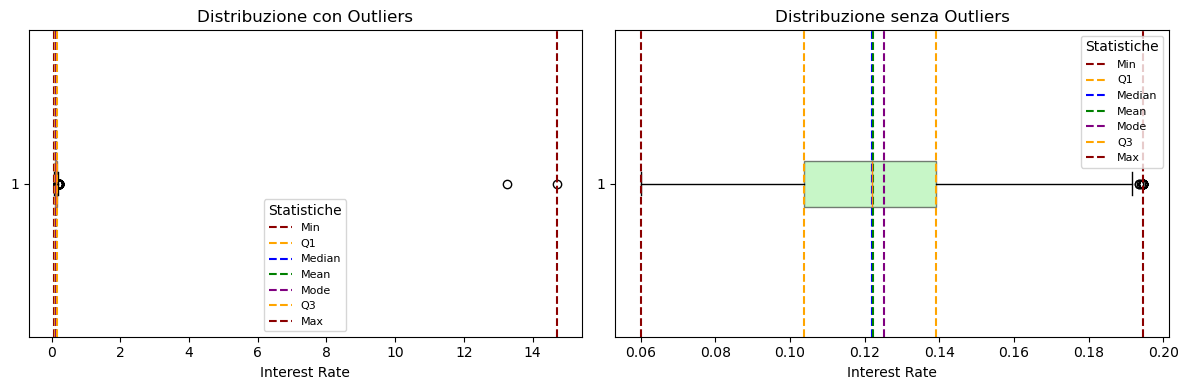

In [22]:
# Funzione per calcolare statistiche
def get_stats(series):
    return {
        "Min": series.min(),
        "Q1": series.quantile(0.25),
        "Median": series.median(),
        "Mean": series.mean(),
        "Mode": series.mode()[0],
        "Q3": series.quantile(0.75),
        "Max": series.max()
    }

# Statistiche per i due dataset
stats_out = get_stats(data['interest_rate'])
stats_clean = get_stats(data_clean['interest_rate'])

# Colori per ciascuna statistica
colors = {
    "Min": "darkred",
    "Q1": "orange",
    "Median": "blue",
    "Mean": "green",
    "Mode": "purple",
    "Q3": "orange",
    "Max": "darkred"
}

# Creazione dei grafici affiancati
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# --- BOXPLOT CON OUTLIERS ---
axes[0].boxplot(data['interest_rate'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightcoral', alpha=0.5))
axes[0].set_title("Distribuzione con Outliers")
axes[0].set_xlabel("Interest Rate")

# Linee verticali per statistiche
for key, value in stats_out.items():
    axes[0].axvline(value, color=colors[key], linestyle='--', linewidth=1.5, label=key)

# Legenda unica e pulita
handles, labels = axes[0].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[0].legend(by_label.values(), by_label.keys(), fontsize=8, title='Statistiche')

# --- BOXPLOT SENZA OUTLIERS ---
axes[1].boxplot(data_clean['interest_rate'], vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightgreen', alpha=0.5))
axes[1].set_title("Distribuzione senza Outliers")
axes[1].set_xlabel("Interest Rate")

# Linee verticali per statistiche
for key, value in stats_clean.items():
    axes[1].axvline(value, color=colors[key], linestyle='--', linewidth=1.5, label=key)

# Legenda unica e pulita
handles, labels = axes[1].get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[1].legend(by_label.values(), by_label.keys(), fontsize=8, title='Statistiche')

plt.tight_layout()
plt.show()


Notiamo che la deviazione standard è diminuita dopo la pulizia rendendo i valori della variabile più omogeni. 
Così anche il valore massimo che è un pò più realistico...
Tuttavia troviamo un'asimmetria verso destra (right-skewed), con un picco principale intorno a 0.12.

<a id="interest-rate-skewness"></a>
Calcoliamo la Skewness e Curtosi

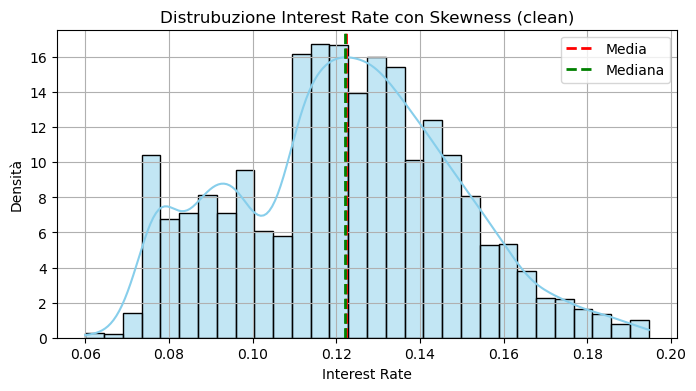

Skewness:  0.06


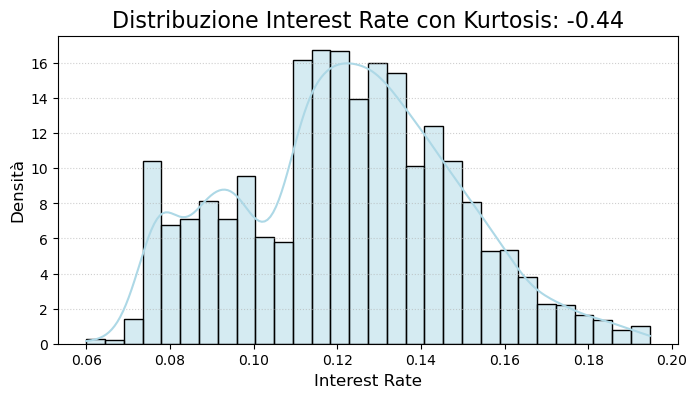

Kurtosis: -0.44


In [23]:
plt.figure(figsize=(8,4))
sns.histplot(data_clean['interest_rate'], bins = 30, kde=True, color='skyblue', stat='density')

plt.axvline(data_clean['interest_rate'].mean(), color='red', linestyle='dashed', linewidth=2, label='Media' )
plt.axvline(data_clean['interest_rate'].median(), color='green', linestyle='dashed', linewidth=2, label='Mediana')

plt.title('Distrubuzione Interest Rate con Skewness (clean)')
plt.xlabel('Interest Rate')
plt.ylabel('Densità')
plt.legend()
plt.grid()

plt.show()

skewness = data_clean['interest_rate'].skew()
print(f'Skewness: {skewness: .2f}')

kurtosis = data_clean['interest_rate'].kurt()
plt.figure(figsize=(8, 4))

sns.histplot(data=data_clean, x='interest_rate', bins=30, kde=True, color='lightblue', stat='density')



plt.title(f"Distribuzione Interest Rate con Kurtosis: {kurtosis:.2f}", fontsize=16)
plt.xlabel('Interest Rate', fontsize=12)
plt.ylabel('Densità', fontsize=12)
plt.grid(axis='y', linestyle=':', alpha=0.6)

plt.show()



print(f'Kurtosis: {kurtosis: .2f}')



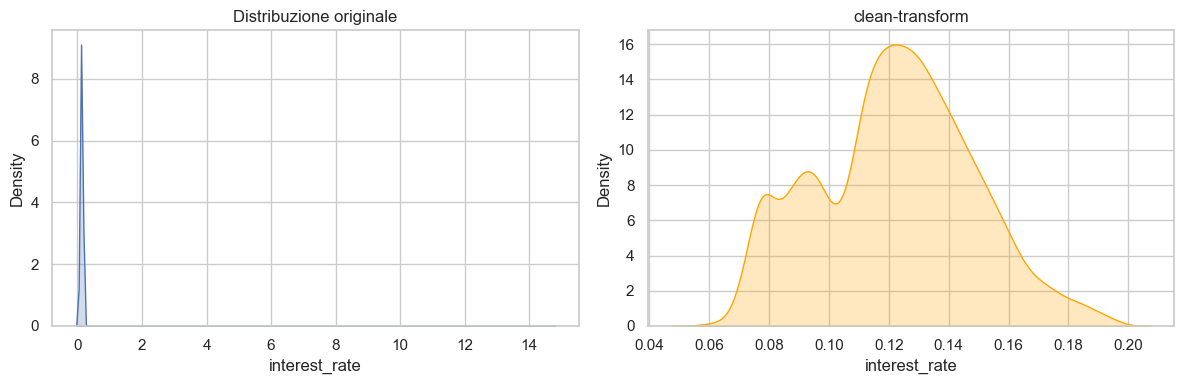


INTEREST_RATE
Asimmetria_Skewness: 67.42 | Kurtosis: 4637.05
Asimmetria_Skewness: 0.06 | Kurtosis: -0.44


In [24]:
sns.set(style="whitegrid")

# ------------------------------------------------------------
# 3️⃣  Analisi di skewness e kurtosis (asimmetria e code)
# ------------------------------------------------------------
skew = data['interest_rate'].skew()
kurt = data['interest_rate'].kurt()

skew = data_clean['interest_rate'].skew()
kurt = data_clean['interest_rate'].kurt()

# ------------------------------------------------------------
# 5️⃣  Confronto visivo delle trasformazioni
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.kdeplot(data['interest_rate'], ax=axes[0], fill=True)
axes[0].set_title('Distribuzione originale')

sns.kdeplot(data_clean['interest_rate'], ax=axes[1], fill=True, color='orange')
axes[1].set_title('clean-transform')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 6️⃣  Analisi dopo trasformazioni
# ------------------------------------------------------------
for col in ['interest_rate']:
    print(f"\n{col.upper()}")
    print(f"Asimmetria_Skewness: {data[col].skew():.2f} | Kurtosis: {data[col].kurt():.2f}")

    print(f"Asimmetria_Skewness: {data_clean[col].skew():.2f} | Kurtosis: {data_clean[col].kurt():.2f}")

Skewness = 0.07 è molto vicina a 0, quindi la distribuzione è quasi simmetrica.
Tuttavia, essendo leggermente positiva, indica una piccola coda a destra, cioè ci sono alcuni valori di interest_rate un po’ più alti che spingono leggermente la media sopra la mediana.

La media e la mediana sono molto vicine, confermando la quasi simmetria, la leggera differenza tra le due è coerente con lo skewness positivo di 0.07.



La distribuzione del tasso d’interesse è molto equilibrata, con una forma quasi normale, e senza evidenti distorsioni.
Questo significa che non ci sono forti estremi che influenzano i valori medi.

In un contesto finanziario, ciò suggerisce una stabilità nei tassi d’interesse e assenza di forti valori anomali residui dopo la pulizia.

Un valore negativo di curtosi indica che la distribuzione è platicurtica.
La distribuzione ha un picco più piatto (e spesso più largo) rispetto alla distribuzione normale.
La distribuzione ha code più leggere (cioè, valori estremi meno probabili) rispetto alla distribuzione normale. In questo contesto, le osservazioni sono più concentrate intorno alla media, ma in modo meno "appuntito" di una curva a campana ideale.

La distribuzione del Tasso di Interesse è bimodale, suggerendo l'esistenza di due sottogruppi distinti di tassi.

<a id="interest-rate-complete"></a>
VISUALIZZIAMO LE STATISTICHE DESCRITTIVE

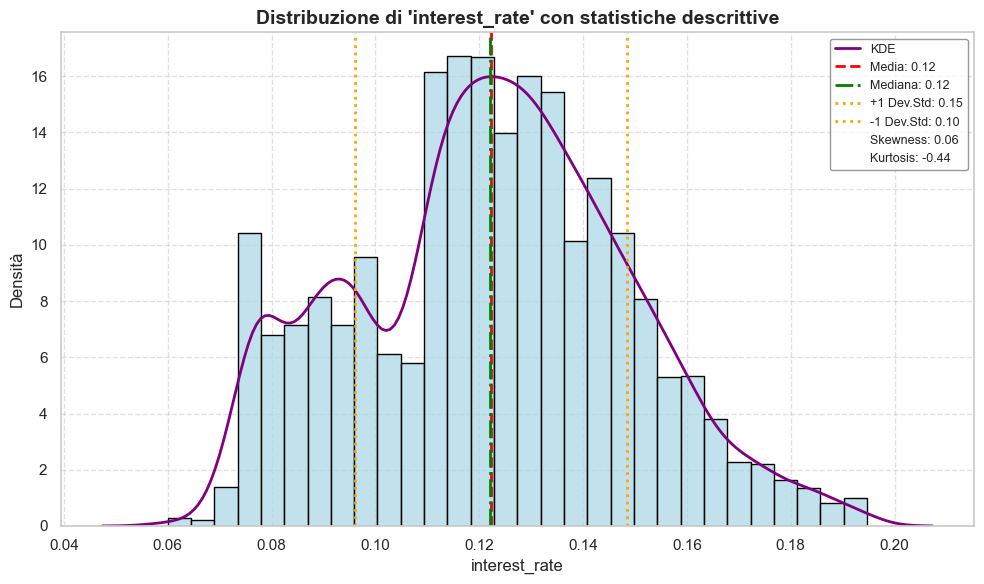

In [25]:
colonna = 'interest_rate'

vals = data_clean[colonna].dropna()

mean_dc = vals.mean()
median_dc = vals.median()
skewness = vals.skew()
kurtosis = vals.kurt()
std_dc = vals.std()


plt.figure(figsize=(10, 6))

sns.histplot(vals, bins=30, color='lightblue', edgecolor='black', stat='density', kde=False)
sns.kdeplot(vals, color='purple', lw=2, label='KDE')

plt.axvline(mean_dc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_dc:.2f}')
plt.axvline(median_dc, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {median_dc:.2f}')
plt.axvline(mean_dc + std_dc, color='orange', linestyle=':', linewidth=2, label=f'+1 Dev.Std: {(mean_dc + std_dc):.2f}')
plt.axvline(mean_dc - std_dc, color='orange', linestyle=':', linewidth=2, label=f'-1 Dev.Std: {(mean_dc - std_dc):.2f}')

plt.plot([], [], ' ', label=f'Skewness: {skewness:.2f}')
plt.plot([], [], ' ', label=f'Kurtosis: {kurtosis:.2f}')

plt.title(f"Distribuzione di '{colonna}' con statistiche descrittive", fontsize=14, fontweight='bold')
plt.xlabel(colonna, fontsize=12)
plt.ylabel("Densità", fontsize=12)
plt.legend(fontsize=9, loc='best', frameon=True, facecolor='white', edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


Quindi il tasso di interesse (INTEREST RATE) medio nel nostro dataset è del 12,5% con la maggior parte dei valori compresi tra il 10% e il 14%
I tassi estremi oltre 20% sono rari, mentre valori sotto 6% rappresentano casi eccezionali o particolarmente favorevoli.

<a id="interest-rate-freq"></a>
Analisi delle Frequenze - Interest Rate


In [26]:
# Analisi delle Frequenze - Interest Rate
# Frequenze assolute
freq_ass = data['interest_rate'].value_counts().sort_index()

# Frequenze relative
freq_rel = data['interest_rate'].value_counts(normalize=True).sort_index()

# Tabella riassuntiva
freq_table = pd.DataFrame({
    'Frequenza assoluta': freq_ass,
    'Frequenza relativa': freq_rel,
    'Frequenza cumulativa': freq_rel.cumsum()
})

print(freq_table.head(10))  # Mostra le prime 10 righe

               Frequenza assoluta  Frequenza relativa  Frequenza cumulativa
interest_rate                                                              
0.0600                          8            0.000841              0.000841
0.0639                          4            0.000421              0.001262
0.0676                          9            0.000947              0.002209
0.0705                         23            0.002419              0.004628
0.0712                          8            0.000841              0.005469
0.0714                         28            0.002945              0.008414
0.0737                         32            0.003366              0.011780
0.0740                         72            0.007573              0.019352
0.0743                         30            0.003155              0.022507
0.0751                         38            0.003997              0.026504


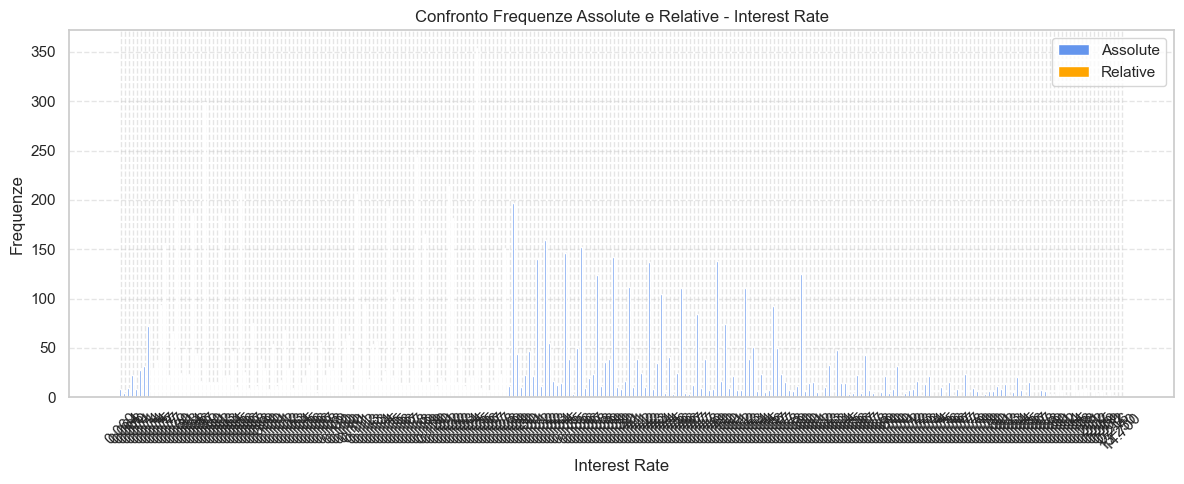

In [27]:

x = np.arange(len(freq_table.index))

plt.figure(figsize=(12,5))
plt.bar(x - 0.2, freq_table['Frequenza assoluta'], width=0.4, color='cornflowerblue', label='Assolute')
plt.bar(x + 0.2, freq_table['Frequenza relativa'], width=0.4, color='orange', label='Relative')
plt.xticks(x, [f"{v:.3f}" for v in freq_table.index], rotation=45)
plt.title('Confronto Frequenze Assolute e Relative - Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequenze')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<a id="interest-rate-ecdf"></a>
ECD (Empirical Cumulative Distribution Function) - Interest Rate

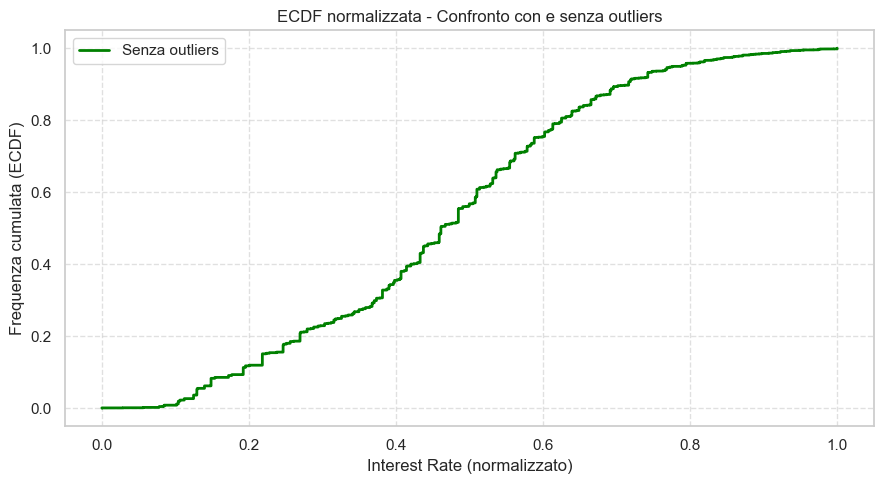

In [28]:
# Normalizzazione 0–1 per confronto equo


x_clean = np.sort((data_clean['interest_rate'] - data_clean['interest_rate'].min()) /
                  (data_clean['interest_rate'].max() - data_clean['interest_rate'].min()))
y_clean = np.arange(1, len(x_clean)+1) / len(x_clean)

plt.figure(figsize=(9, 5))

plt.step(x_clean, y_clean, where='post', color='green', linewidth=2, label='Senza outliers')

plt.title('ECDF normalizzata - Confronto con e senza outliers')
plt.xlabel('Interest Rate (normalizzato)')
plt.ylabel('Frequenza cumulata (ECDF)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<a id="interest-rate-conclusioni"></a>
<font size="6">CONCLUSIONI</font>

<font size="4">PRIMA DEL CLEANING

Il mercato (o dataset) iniziale sembrava contenere casi estremi o anomali, che avrebbero potuto far pensare a condizioni di credito o rendimento completamente irrealistiche e quindi avrebbero falsato qualsiasi conclusione su costi del capitale o politiche monetarie.

La distribuzione iniziale del tasso di interesse era fortemente distorta verso destra (Skewness = 67.65) e molto appuntita (Kurtosis = 4669.57),ciò indica la presenza di pochi valori estremamente elevati (outlier), che spingono la media verso l'alto.
Il massimo di 14.7 (1.470%) è anomalo: in termini economici, un tasso di interesse così alto non è realistico per strumenti finanziari normali (es. prestiti, mutui o rendimenti su investimenti standard).
Si tratta di errori di inserimento o valori fuori scala.

DOPO IL CLEANING

Il mercato dei tassi d'interesse appare stabile e coerente.
In altre parole, non ci sono più estremi di rischio o casi anomali e il sistema sembra equilibrato e regolare.

Dopo la rimozione degli outlier, la distribuzione risulta centrata attorno al 12.2%, con una deviazione standard molto bassa (≈ 2.6%).
Skewness ≈ 0 e Kurtosis ≈ -0.45 → la distribuzione è simmetrica e leggermente platicurtica (piatta).
Questo suggerisce una maggiore omogeneità nei tassi dove la maggior parte si concentra in un intervallo ristretto (10%–14%).

</font>

<a id="installment-analisi"></a>
# ANALISI DI INSTALLMENT (RATA MENSILE)

<a id="installment-dist"></a>
Valori presenti 

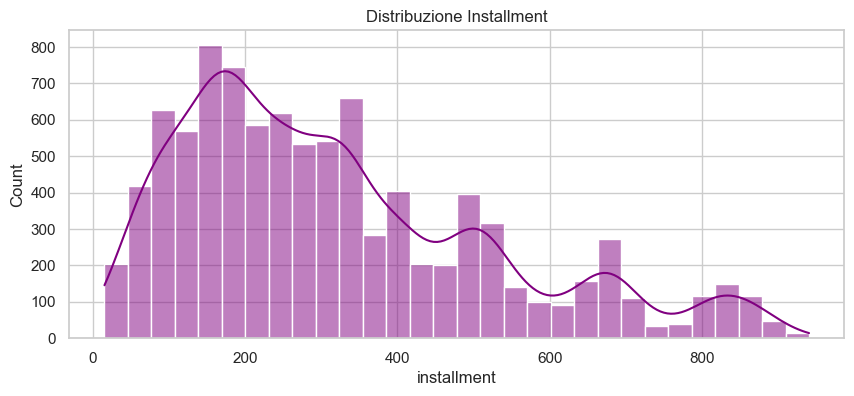

STATISTICHE DESCRITTIVE:

count    9508.000000
mean      320.152235
std       207.083521
min        15.670000
25%       164.020000
50%       269.545000
75%       435.232500
max       940.140000
Name: installment, dtype: float64


In [29]:
plt.figure(figsize=(10,4))
sns.histplot(data['installment'], kde=True, bins = 30, color='purple')
plt.title('Distribuzione Installment')
plt.show()

print('STATISTICHE DESCRITTIVE:\n')
print(data['installment'].describe())

<a id="installment-boxplot"></a>
Osserviamolo con un boxplot

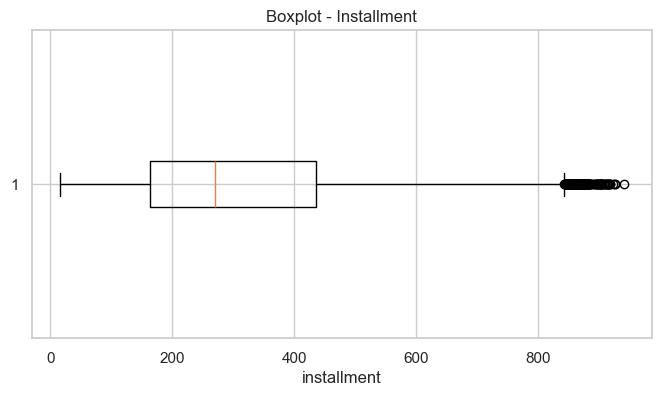

In [30]:
plt.figure(figsize=(8,4))
plt.boxplot(data['installment'], vert=False)
plt.title('Boxplot - Installment')
plt.xlabel('installment')
plt.show()

Calcoliamo gli intervalli


In [31]:
Q1 = data['installment'].quantile(0.25)
Q3 = data['installment'].quantile(0.75)
IQR = Q3 - Q1

lowerBound = Q1 - 1.5 * IQR
upperBound = Q3 + 1.5* IQR

print(f'Limite Inferiore: {lowerBound:.2f}')
print(f'Limite Superire: {upperBound:.2f}')



Limite Inferiore: -242.80
Limite Superire: 842.05


CALCOLIAMO GLI OUTLIERS 

In [32]:
# Filtrare i lower outliers classici (valori bassi estremi)
lower_outliers = data[data['installment'] < lowerBound]

# Filtrare gli upper outliers
upper_outliers = data[data['installment'] > upperBound]

print("Numero di lower outliers:", len(lower_outliers))
print("Numero di upper outliers:", len(upper_outliers))

Numero di lower outliers: 0
Numero di upper outliers: 193


In [33]:
all_outliers = data[(data['installment'] < lowerBound) | (data['installment'] > upperBound)]

print("Numero totale di outlier :", all_outliers.shape[0])

Numero totale di outlier : 193


In [34]:
all_outliers = data[(data['installment'] < lowerBound) | (data['installment'] > upperBound)]
print("Esempi di outlier:")
print(all_outliers[['installment','dti', 'customer_id']].head())

Esempi di outlier:
     installment    dti  customer_id
237       859.07  20.79        10238
249       842.47  12.81        10250
271       862.97   5.79        10272
275       851.41  19.78        10276
322       876.83  18.08        10323


CONSIDERATO  che i miei dati discostano per pochi centesimi e soprattutto ancora non so se effettivamente siano outliers o semplicemente pagano molto rispetto alla media provo a fare un capping.. ovvero cambio gli outliers con il mio valore max

ADESSO POSSIAMO PROVARE A TOGLIERE QUESTI OUTLIERS

In [35]:
total_count_installment = len(data)
all_outliers_count = len(all_outliers)

data_clean_installment = data[(data['installment'] >= lowerBound) & (data['installment']  <= upperBound)]

print("Numero totale di outlier realistici:", all_outliers.shape[0])
print(f'Dimensione dataset pulito: {data_clean_installment.shape[0]}')


Numero totale di outlier realistici: 193
Dimensione dataset pulito: 9315


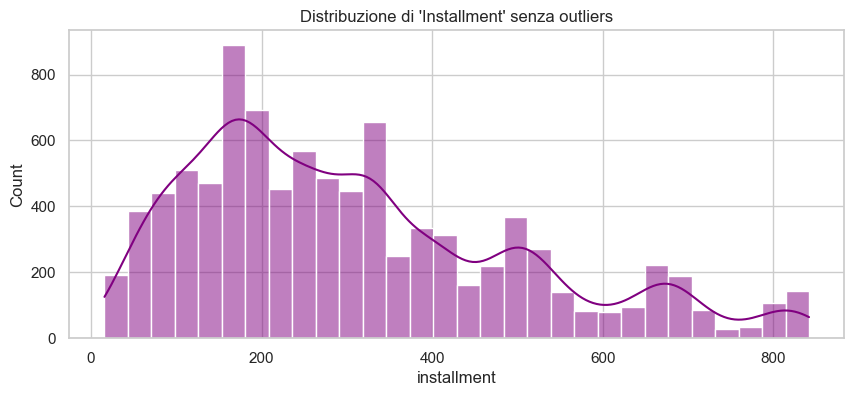

STATISTICHE DESCRITTIVE:

count    9315.000000
mean      308.693914
std       193.118765
min        15.670000
25%       163.170000
50%       266.400000
75%       414.500000
max       841.760000
Name: installment, dtype: float64


In [36]:
plt.figure(figsize=(10,4))
sns.histplot(data_clean_installment['installment'], kde = True, bins = 30, color = 'purple')
plt.title("Distribuzione di 'Installment' senza outliers")
plt.show()

print('STATISTICHE DESCRITTIVE:\n')
print(data_clean_installment['installment'].describe())

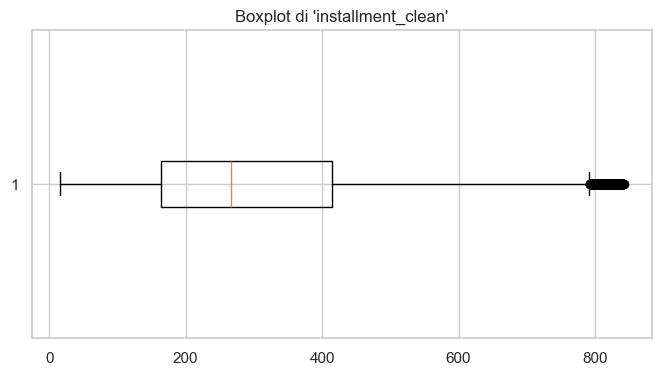

In [37]:
plt.figure(figsize=(8,4))
plt.boxplot(data_clean_installment['installment'], vert = False)
plt.title("Boxplot di 'installment_clean'")
plt.show()

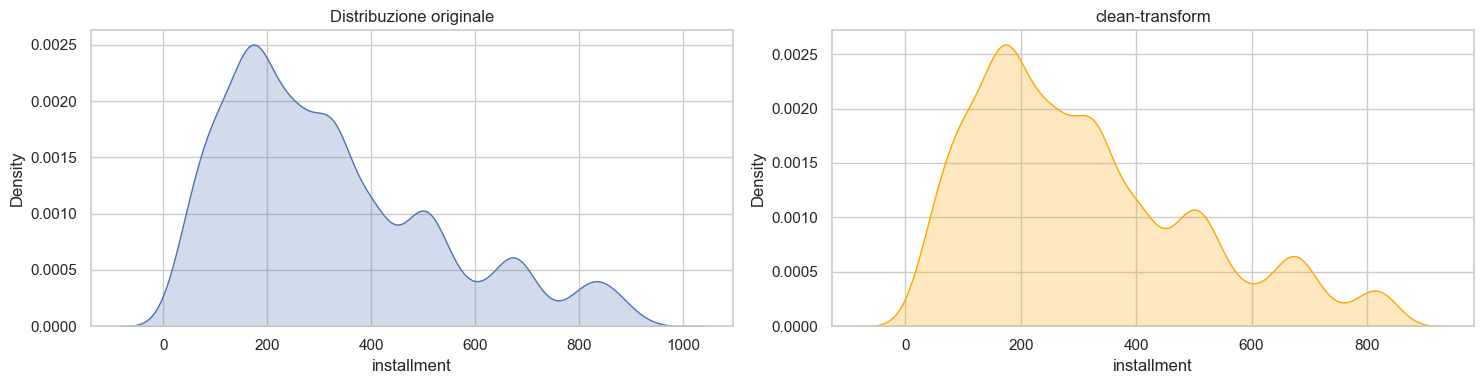


INSTALLMENT
Asimmetria_Skewness: 0.91 | Kurtosis: 0.13
Asimmetria_Skewness: 0.83 | Kurtosis: -0.01


In [38]:
# ANALISI UNIVARIATA DELLA VARIABILE 'installment'
# Imposta lo stile dei grafici
sns.set(style="whitegrid")

# ------------------------------------------------------------
# 3️⃣  Analisi di skewness e kurtosis (asimmetria e code)
# ------------------------------------------------------------
skew = data['installment'].skew()
kurt = data['installment'].kurt()

skew = data_clean_installment['installment'].skew()
kurt = data_clean_installment['installment'].kurt()

# ------------------------------------------------------------
# 5️⃣  Confronto visivo delle trasformazioni
# ------------------------------------------------------------
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
sns.kdeplot(data['installment'], ax=axes[0], fill=True)
axes[0].set_title('Distribuzione originale')

sns.kdeplot(data_clean_installment['installment'], ax=axes[1], fill=True, color='orange')
axes[1].set_title('clean-transform')

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 6️⃣  Analisi dopo trasformazioni
# ------------------------------------------------------------
for col in ['installment']:
    print(f"\n{col.upper()}")
    print(f"Asimmetria_Skewness: {data[col].skew():.2f} | Kurtosis: {data[col].kurt():.2f}")

    print(f"Asimmetria_Skewness: {data_clean_installment[col].skew():.2f} | Kurtosis: {data_clean_installment[col].kurt():.2f}")

Per quanto riguarda l'asimmetria in entrambi casi abbiamo una simmetria positiva, ma nel primo caso abbiamo una distribuzine sbilanciata verso destra mentre dopo il cleaning la distriuzine appare più simmetrica poichè sono stati tolti valori molto alti.

Per quanto riguarda Curtosi invece prima della pulizia la distribuzione è comunque simile a una normale ma con una tendenza ad avere valori più estremi. Dopo il cleaning la forma della distribuzione è più piatta e questo significa che i valori si distribuiscono in modo più uniforme attorno alla media.



A livello di Installment possiamo dire che con la pulizia abbiamo escluso rate molto alte e non andavano a riflettere il comportamento della maggior parte dei clienti

In [39]:
data_clean_installment = data[(data['installment'] >= lowerBound) & (data['installment'] <= upperBound)]

print(f"Dimensione originale: {len(data)}")
print(f"Dopo rimozione outlier: {len(data_clean_installment)}")
print(f"Dati rimossi: {len(data) - len(data_clean_installment)}")

# ------------------------------------------------------------
# 3️⃣ Statistiche descrittive prima e dopo
# ------------------------------------------------------------
def describe_installment(data, label):
    moda = data['installment'].mode()
    moda_value = round(moda.iloc[0], 2) 

    return {
        "Versione": label,
        "Media": round(data['installment'].mean(), 2),
        "Mediana": round(data['installment'].median(), 2),
        "Moda": moda_value,
        "Dev.Std": round(data['installment'].std(), 2),
        "Asimmetria": round(data['installment'].skew(), 2),
        "Kurtosis": round(data['installment'].kurt(), 2)
    }

stats_before = describe_installment(data,"Originale")
stats_after = describe_installment(data_clean_installment, "Dopo pulizia")

comparison = pd.DataFrame([stats_before, stats_after])
print("\n📊 CONFRONTO STATISTICHE:")
print(comparison.to_string(index=False))


Dimensione originale: 9508
Dopo rimozione outlier: 9315
Dati rimossi: 193

📊 CONFRONTO STATISTICHE:
    Versione  Media  Mediana   Moda  Dev.Std  Asimmetria  Kurtosis
   Originale 320.15   269.55 317.72   207.08        0.91      0.13
Dopo pulizia 308.69   266.40 317.72   193.12        0.83     -0.01


Dopo la pulizia, la media e la deviazione standard si riducono, segno che i valori estremi (rate altissime) influenzavano la media in modo non rappresentativo.

La mediana resta quasi identica → la parte centrale della popolazione non cambia, quindi la pulizia non ha eliminato clienti “tipici”, ma solo eccezioni.

L’asimmetria positiva si riduce da 0.91 → 0.83 → ora la distribuzione è più equilibrata, meno “tirata” da prestiti di importo elevato.

La curtosi scende leggermente sotto zero → la curva diventa più piatta, quindi la concentrazione attorno alla media è più stabile.

Considerazione economica

In termini economici, la pulizia dei dati ha permesso di isolare il comportamento del cliente medio, rimuovendo quei pochi casi di prestiti molto elevati (rate > 790 €) che distorcevano le statistiche complessive.

Il cliente tipico paga rate mensili di circa 270–310 €, che rappresentano prestiti di entità medio-bassa, compatibili con finalità comuni.

La riduzione della variabilità (Dev.Std da 207 → 193 €) indica che la popolazione di clienti è più omogenea dopo la pulizia.

La moda non cambia perché i valori di installment sono continui, ma la sua stabilità conferma che il centro della distribuzione non è stato toccato: la pulizia ha riguardato solo le code.

<font size="6">Credit_history_days</font>

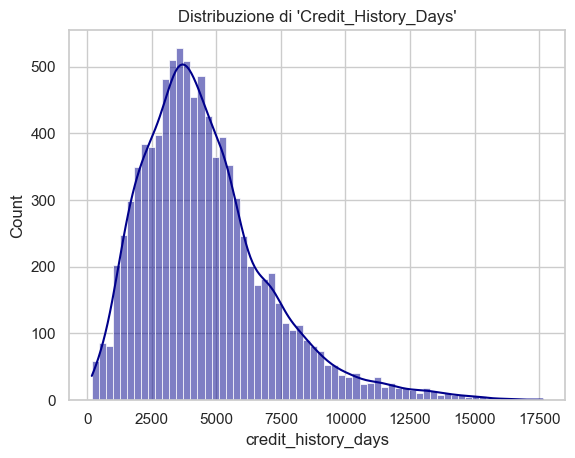

count     9508.000000
mean      4566.344881
std       2498.641022
min        180.041667
25%       2820.000000
50%       4139.958333
75%       5730.041667
max      17639.958330
Name: credit_history_days, dtype: float64

Skewness: 1.1584
Kurtosis: 1.9393


In [40]:
sns.histplot (data = data, x ='credit_history_days', kde = True, color = 'darkblue')
plt.title("Distribuzione di 'Credit_History_Days'")
plt.show()

print(data['credit_history_days'].describe())

print(f"\nSkewness: {data['credit_history_days'].skew():.4f}")
print(f"Kurtosis: {data['credit_history_days'].kurt():.4f}")


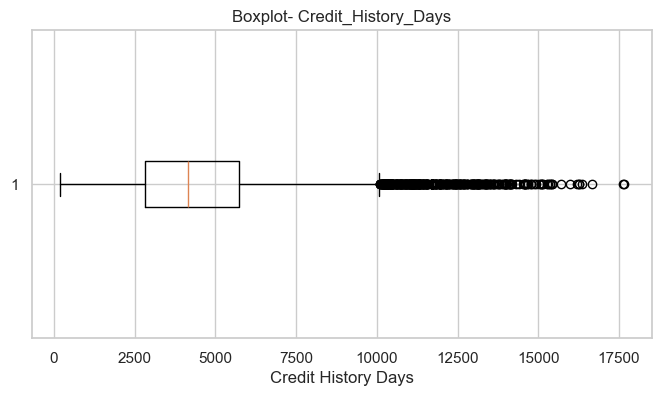

In [41]:
plt.figure(figsize=(8,4))
plt.boxplot(data['credit_history_days'], vert=False)
plt.title('Boxplot- Credit_History_Days')
plt.xlabel('Credit History Days')
plt.show()

In [42]:
Q1 = data['credit_history_days'].quantile(0.25)
Q3 = data['credit_history_days'].quantile(0.75)
IQR = Q3 - Q1

lower_bound_chd = Q1 - 1.5 * IQR
upper_bound_chd = Q3 + 1.5 * IQR

print(f'Limite Inferiore: {lower_bound_chd:.4f}')
print(f'Limite Superiore: {upper_bound_chd:.4f}')

Limite Inferiore: -1545.0625
Limite Superiore: 10095.1042


In [43]:
lower_outliers_chd = data[data['credit_history_days'] < lower_bound_chd]

# Filtrare gli upper outliers
upper_outliers_chd = data[data['credit_history_days'] > upper_bound_chd]

print("Numero di lower outliers:", len(lower_outliers_chd))
print("Numero di upper outliers:", len(upper_outliers_chd))

Numero di lower outliers: 0
Numero di upper outliers: 346


In [44]:
print('Es:')
print(upper_outliers_chd['credit_history_days'].head())

Es:
21     11951.00000
55     14008.95833
92     13349.95833
96     10292.00000
113    16213.00000
Name: credit_history_days, dtype: float64


**Violin plot:** combina boxplot e KDE

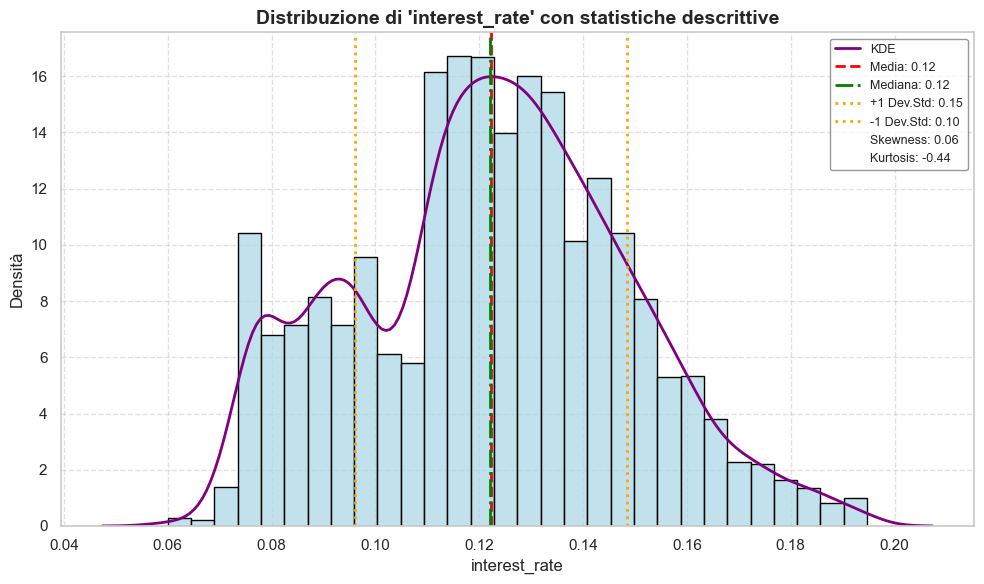

In [45]:
colonna = 'interest_rate'

vals = data_clean[colonna].dropna()

mean_dc = vals.mean()
median_dc = vals.median()
skewness = vals.skew()
kurtosis = vals.kurt()
std_dc = vals.std()


plt.figure(figsize=(10, 6))

sns.histplot(vals, bins=30, color='lightblue', edgecolor='black', stat='density', kde=False)
sns.kdeplot(vals, color='purple', lw=2, label='KDE')

plt.axvline(mean_dc, color='red', linestyle='--', linewidth=2, label=f'Media: {mean_dc:.2f}')
plt.axvline(median_dc, color='green', linestyle='-.', linewidth=2, label=f'Mediana: {median_dc:.2f}')
plt.axvline(mean_dc + std_dc, color='orange', linestyle=':', linewidth=2, label=f'+1 Dev.Std: {(mean_dc + std_dc):.2f}')
plt.axvline(mean_dc - std_dc, color='orange', linestyle=':', linewidth=2, label=f'-1 Dev.Std: {(mean_dc - std_dc):.2f}')

plt.plot([], [], ' ', label=f'Skewness: {skewness:.2f}')
plt.plot([], [], ' ', label=f'Kurtosis: {kurtosis:.2f}')

plt.title(f"Distribuzione di '{colonna}' con statistiche descrittive", fontsize=14, fontweight='bold')
plt.xlabel(colonna, fontsize=12)
plt.ylabel("Densità", fontsize=12)
plt.legend(fontsize=9, loc='best', frameon=True, facecolor='white', edgecolor='gray')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


### Binning e Categorie

Creiamo categorie di tasso di interesse per facilitare l'interpretazione.

**Bar chart:** frequenza per categoria di tasso

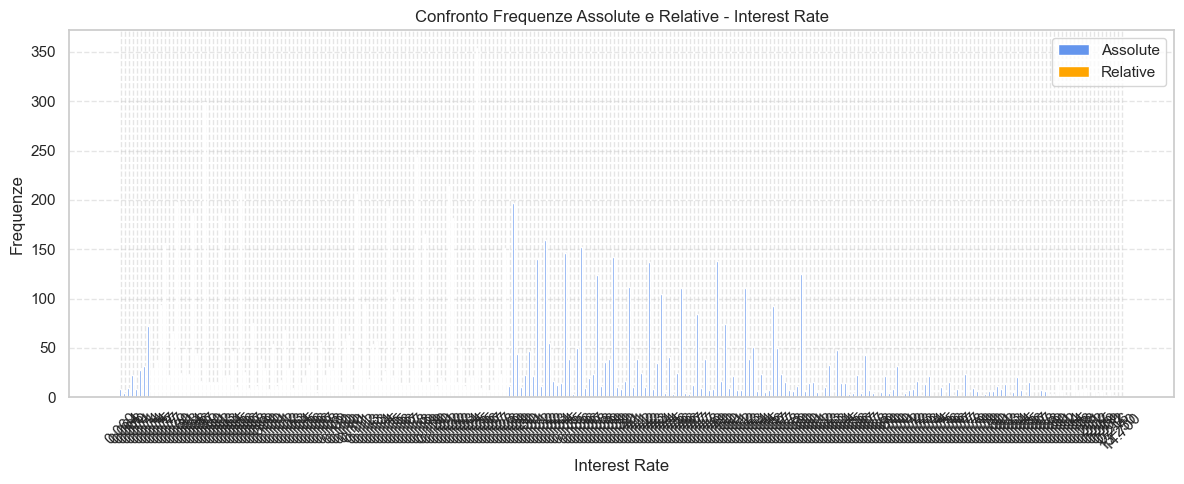

In [46]:
freq_ass = data['interest_rate'].value_counts().sort_index()
freq_rel = data['interest_rate'].value_counts(normalize=True).sort_index()

freq_table = pd.DataFrame({
    'Frequenza assoluta': freq_ass,
    'Frequenza relativa': freq_rel,
    'Frequenza cumulativa': freq_rel.cumsum()
})
x = np.arange(len(freq_table.index))

plt.figure(figsize=(12,5))
plt.bar(x - 0.2, freq_table['Frequenza assoluta'], width=0.4, color='cornflowerblue', label='Assolute')
plt.bar(x + 0.2, freq_table['Frequenza relativa'], width=0.4, color='orange', label='Relative')
plt.xticks(x, [f"{v:.3f}" for v in freq_table.index], rotation=45)
plt.title('Confronto Frequenze Assolute e Relative - Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequenze')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


<a id="installment-analisi"></a>
## INSTALLMENT RATE, DA RIVEDERE


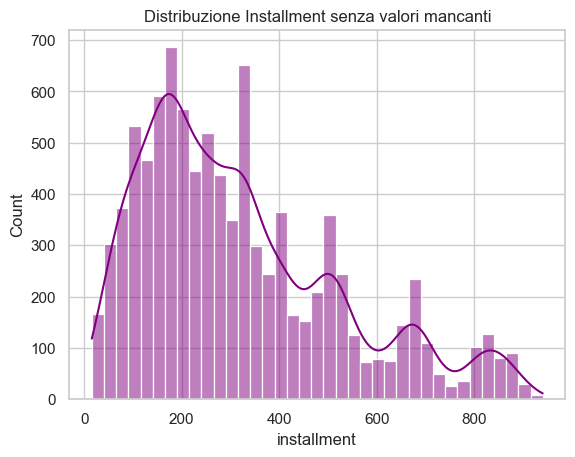

count    9508.000000
mean      320.152235
std       207.083521
min        15.670000
25%       164.020000
50%       269.545000
75%       435.232500
max       940.140000
Name: installment, dtype: float64


In [47]:
sns.histplot(data=data, x ='installment', kde=True, color='purple')
plt.title('Distribuzione Installment senza valori mancanti')
plt.show()

print(data['installment'].describe())

### Statistiche per Categoria

Calcoliamo media, mediana e deviazione standard del FICO Score per ogni categoria.

### Boxplot per Categoria

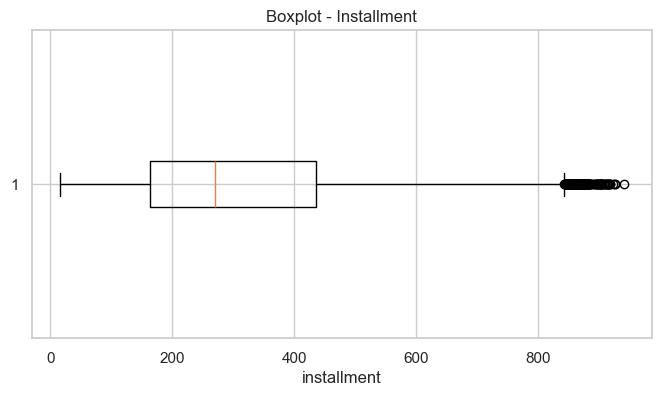

In [48]:
plt.figure(figsize=(8,4))
plt.boxplot(data['installment'], vert=False)
plt.title('Boxplot - Installment')
plt.xlabel('installment')
plt.show()

---
<a id="fico-score"></a>
## 📈 Analisi FICO Score

Il FICO Score misura l'affidabilità creditizia di un cliente (range 300-850). In questa sezione rispondiamo alla domanda: **qual è il FICO Score medio dei richiedenti?**

### Categorie FICO Score

Suddividiamo i punteggi in categorie standard per facilitare l'interpretazione:

- **300-579**: Very Poor (Pessimo)
- **580-669**: Fair (Discreto)
- **670-739**: Good (Buono)
- **740-799**: Very Good (Molto Buono)
- **800-850**: Exceptional (Eccellente)

![FICO Score Categories](images/fico_ranges.jpg)

Questa classificazione segue gli standard FICO ufficiali e ci permette di capire la distribuzione qualitativa del rischio nel nostro portafoglio prestiti.

### Distribuzione FICO Score

**Dashboard completa:** istogramma, boxplot e bar chart delle categorie

In [49]:
# Statistiche descrittive FICO Score
print("=== STATISTICHE FICO SCORE ===")
print(data['fico_score'].describe())
print(f"\nSkewness: {data['fico_score'].skew():.4f}")
print(f"Kurtosis: {data['fico_score'].kurt():.4f}")

=== STATISTICHE FICO SCORE ===
count    9508.000000
mean      711.155974
std        42.033425
min       612.000000
25%       682.000000
50%       707.000000
75%       737.000000
max      1812.000000
Name: fico_score, dtype: float64

Skewness: 4.8531
Kurtosis: 109.6038


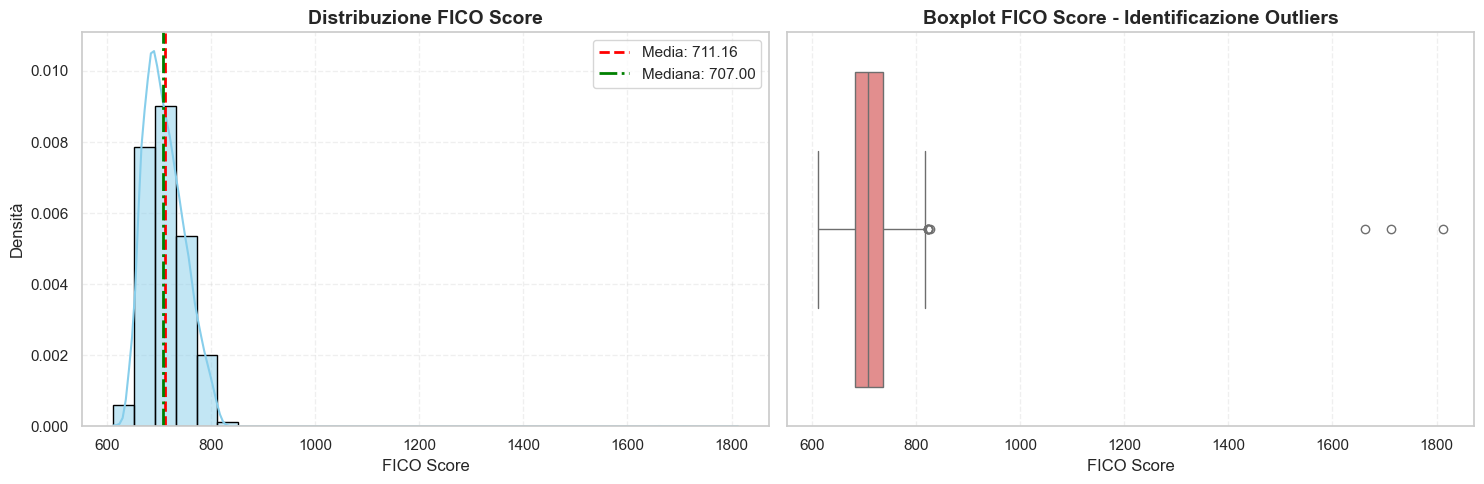

In [50]:
# Visualizzazione distribuzione FICO Score
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Istogramma + KDE
ax1 = axes[0]
sns.histplot(data['fico_score'], bins=30, kde=True, color='skyblue', edgecolor='black', ax=ax1, stat='density')
ax1.axvline(data['fico_score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {data["fico_score"].mean():.2f}')
ax1.axvline(data['fico_score'].median(), color='green', linestyle='-.', linewidth=2, label=f'Mediana: {data["fico_score"].median():.2f}')
ax1.set_title('Distribuzione FICO Score', fontsize=14, fontweight='bold')
ax1.set_xlabel('FICO Score', fontsize=12)
ax1.set_ylabel('Densità', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.3)

# Boxplot
ax2 = axes[1]
sns.boxplot(x=data['fico_score'], color='lightcoral', ax=ax2)
ax2.set_title('Boxplot FICO Score - Identificazione Outliers', fontsize=14, fontweight='bold')
ax2.set_xlabel('FICO Score', fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [51]:
# Identificazione outliers per FICO Score
Q1_fico = data['fico_score'].quantile(0.25)
Q3_fico = data['fico_score'].quantile(0.75)
IQR_fico = Q3_fico - Q1_fico

lower_bound_fico = Q1_fico - 1.5 * IQR_fico
upper_bound_fico = Q3_fico + 1.5 * IQR_fico

print(f'Limite inferiore: {lower_bound_fico:.2f}')
print(f'Limite superiore: {upper_bound_fico:.2f}')

outliers_fico = data[(data['fico_score'] < lower_bound_fico) | (data['fico_score'] > upper_bound_fico)]
print(f'\nNUMERO DI OUTLIERS TROVATI: {outliers_fico.shape[0]}')
print(f'Percentuale di outliers: {(outliers_fico.shape[0] / len(data)) * 100:.2f}%')

Limite inferiore: 599.50
Limite superiore: 819.50

NUMERO DI OUTLIERS TROVATI: 8
Percentuale di outliers: 0.08%


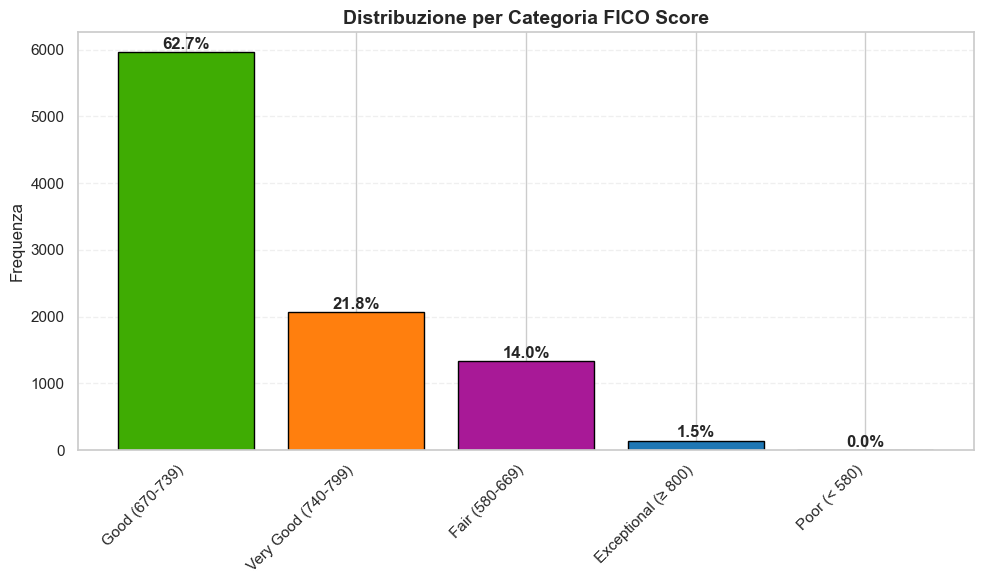


=== DISTRIBUZIONE PER CATEGORIA ===
Good (670-739): 5963 (62.72%)
Very Good (740-799): 2071 (21.78%)
Fair (580-669): 1331 (14.00%)
Exceptional (≥ 800): 143 (1.50%)
Poor (< 580): 0 (0.00%)


In [52]:
def classify_fico(score):
    if score < 580:
        return 'Poor (< 580)'
    elif score < 670:
        return 'Fair (580-669)'
    elif score < 740:
        return 'Good (670-739)'
    elif score < 800:
        return 'Very Good (740-799)'
    else:
        return 'Exceptional (≥ 800)'

data['fico_category'] = data['fico_score'].apply(classify_fico)

category_order = ['Poor (< 580)','Fair (580-669)', 'Good (670-739)', 'Very Good (740-799)', 'Exceptional (≥ 800)']
data['fico_category'] = pd.Categorical(data['fico_category'], categories=category_order, ordered=True)

plt.figure(figsize=(10, 6))

fico_counts = data['fico_category'].value_counts()  
colors = ['#3fac03', '#ff7f0e', "#a81997", '#1f77b4', '#9467bd']
plt.bar(range(len(fico_counts)), fico_counts.values, color=colors, edgecolor='black')
plt.xticks(range(len(fico_counts)), fico_counts.index, rotation=45, ha='right')
plt.title('Distribuzione per Categoria FICO Score', fontsize=14, fontweight='bold')
plt.ylabel('Frequenza', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')

# Percentuali
for i, (cat, count) in enumerate(fico_counts.items()):
    pct = (count / len(data)) * 100
    plt.text(i, count + 50, f'{pct:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n=== DISTRIBUZIONE PER CATEGORIA ===")
for cat, count in fico_counts.items():
    print(f"{cat}: {count} ({(count/len(data))*100:.2f}%)")

---
<a id="purpose-analisi"></a>
## 🎯 Analisi Purpose (Scopi dei Prestiti)

**Quali sono gli scopi più comuni per cui le persone richiedono prestiti?**


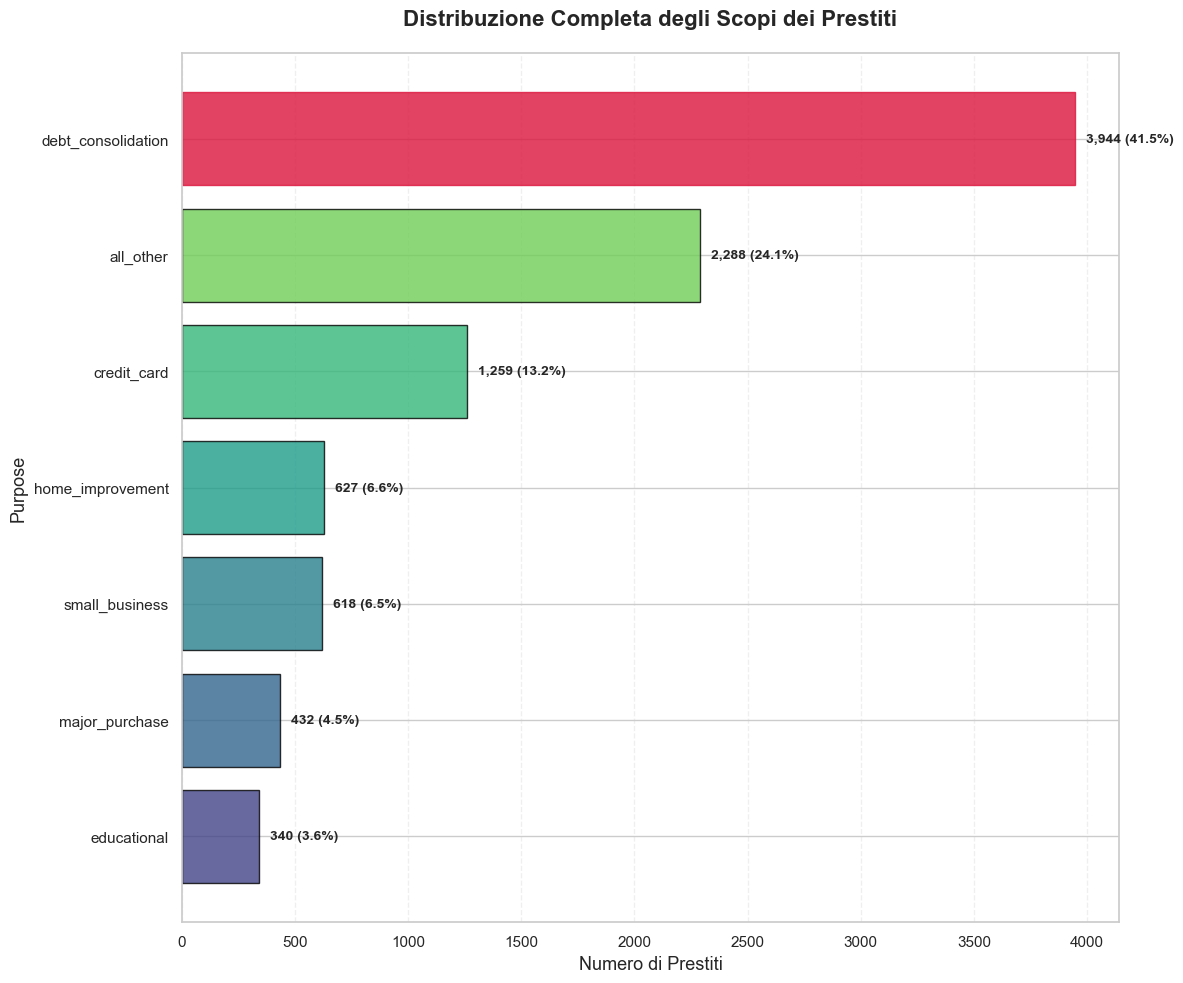


                    STATISTICHE PURPOSE
Purpose                               Count      Percentage
----------------------------------------------------------------------
debt_consolidation                    3,944          41.48%
all_other                             2,288          24.06%
credit_card                           1,259          13.24%
home_improvement                        627           6.59%
small_business                          618           6.50%
major_purchase                          432           4.54%
educational                             340           3.58%
TOTALE                                9,508         100.00%

Numero totale di categorie:         7
Categoria più frequente:            debt_consolidation (3,944 prestiti)
Categoria meno frequente:           educational (340 prestiti)


In [53]:

purpose_counts = data['purpose'].value_counts()
purpose_pct = (purpose_counts / len(data) * 100)

# Ordina i valori in ordine crescente per migliore leggibilità
purpose_counts_sorted = purpose_counts.sort_values()

# Crea il grafico
fig, ax = plt.subplots(figsize=(12, 10))

# Usa una palette di colori gradient
colors_gradient = plt.cm.viridis(np.linspace(0.2, 0.9, len(purpose_counts_sorted)))

# Crea le barre orizzontali
bars = ax.barh(range(len(purpose_counts_sorted)), 
               purpose_counts_sorted.values, 
               color=colors_gradient, 
               edgecolor='black',
               alpha=0.8)

# Colora in rosso la barra più alta
max_idx = np.argmax(purpose_counts_sorted.values)
bars[max_idx].set_color('crimson')

# Aggiungi le percentuali alla fine di ogni barra
for i, (purpose, count) in enumerate(purpose_counts_sorted.items()):
    pct = (count / len(data)) * 100
    ax.text(count + 50, i, f'{count:,} ({pct:.1f}%)', 
            va='center', fontweight='bold', fontsize=10)

# Imposta le etichette sull'asse Y
ax.set_yticks(range(len(purpose_counts_sorted)))
ax.set_yticklabels(purpose_counts_sorted.index, fontsize=11)

# Titoli e etichette
ax.set_title('Distribuzione Completa degli Scopi dei Prestiti', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Numero di Prestiti', fontsize=13)
ax.set_ylabel('Purpose', fontsize=13)

# Griglia per facilitare la lettura
ax.grid(True, linestyle='--', alpha=0.3, axis='x')


plt.tight_layout()
plt.show()

# === TABELLA RIASSUNTIVA ===
print("\n" + "="*70)
print(" "*20 + "STATISTICHE PURPOSE")
print("="*70)
print(f"{'Purpose':<30} {'Count':>12} {'Percentage':>15}")
print("-"*70)
for purpose, count in purpose_counts.items():
    pct = (count / len(data)) * 100
    print(f"{purpose:<30} {count:>12,} {pct:>14.2f}%")
print("="*70)
print(f"{'TOTALE':<30} {len(data):>12,} {100.0:>14.2f}%")
print("="*70)

# Statistiche aggiuntive
print(f"\n{'Numero totale di categorie:':<35} {len(purpose_counts)}")
print(f"{'Categoria più frequente:':<35} {purpose_counts.index[0]} ({purpose_counts.iloc[0]:,} prestiti)")
print(f"{'Categoria meno frequente:':<35} {purpose_counts.index[-1]} ({purpose_counts.iloc[-1]:,} prestiti)")

---
<a id="annual-income"></a>
# Analizziamo il profilo generale dei redditi dei clienti

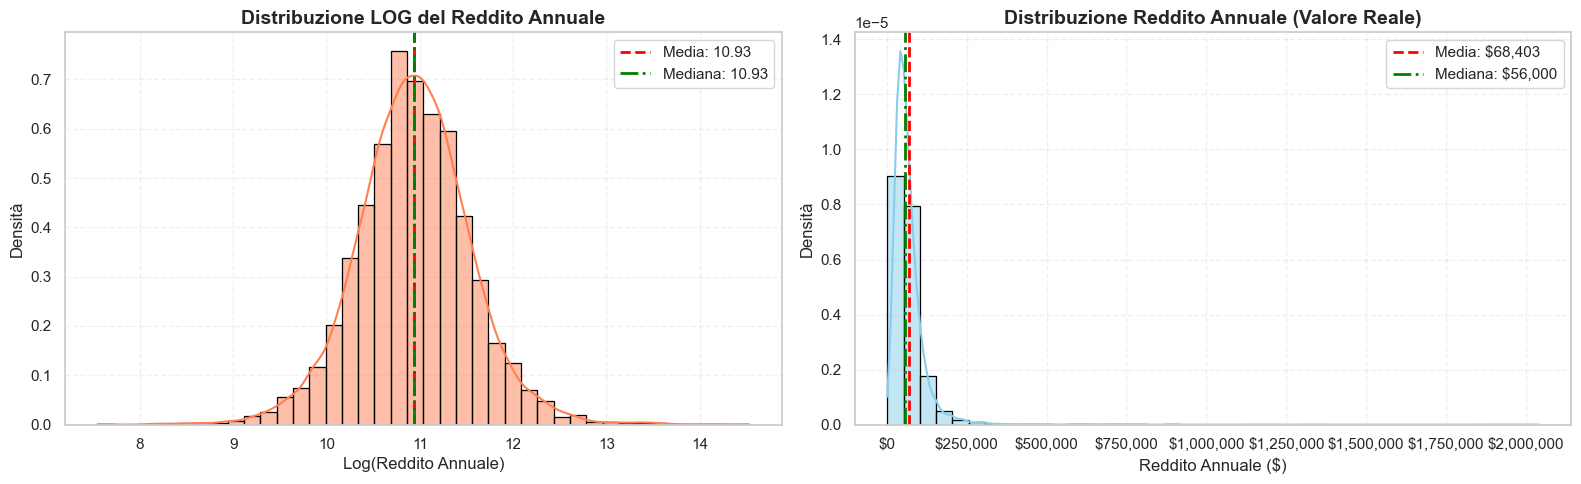


Skewness (Log): 0.0636
Skewness (Reale): 9.6762
min 1896.0000003508226
max 2039784.004362027
mean 68402.9707496203
std 61126.934674854514


In [54]:

fig, axes = plt.subplots(1, 2, figsize=(16, 5))
data['annual_income'] = np.exp(data['log_annual_income'])

ax1 = axes[0]
sns.histplot(data['log_annual_income'], bins=40, kde=True, color='coral', edgecolor='black', ax=ax1, stat='density')
ax1.axvline(data['log_annual_income'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: {data["log_annual_income"].mean():.2f}')
ax1.axvline(data['log_annual_income'].median(), color='green', linestyle='-.', linewidth=2, 
            label=f'Mediana: {data["log_annual_income"].median():.2f}')
ax1.set_title('Distribuzione LOG del Reddito Annuale', fontsize=14, fontweight='bold')
ax1.set_xlabel('Log(Reddito Annuale)', fontsize=12)
ax1.set_ylabel('Densità', fontsize=12)
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.3)


ax2 = axes[1]
sns.histplot(data['annual_income'], bins=40, kde=True, color='skyblue', edgecolor='black', ax=ax2, stat='density')
ax2.axvline(data['annual_income'].mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Media: ${data["annual_income"].mean():,.0f}')
ax2.axvline(data['annual_income'].median(), color='green', linestyle='-.', linewidth=2, 
            label=f'Mediana: ${data["annual_income"].median():,.0f}')
ax2.set_title('Distribuzione Reddito Annuale (Valore Reale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Reddito Annuale ($)', fontsize=12)
ax2.set_ylabel('Densità', fontsize=12)
ax2.legend()
ax2.grid(True, linestyle='--', alpha=0.3)


ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()

print(f"\nSkewness (Log): {data['log_annual_income'].skew():.4f}")
print(f"Skewness (Reale): {data['annual_income'].skew():.4f}")

data['annual_income'].describe()
print("min", data['annual_income'].min())
print("max", data['annual_income'].max())
print("mean", data['annual_income'].mean())
print("std", data['annual_income'].std())